<a href="https://colab.research.google.com/github/alxmx/portfolio-alex-rosado/blob/main/data_analysis_ploting__MED7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

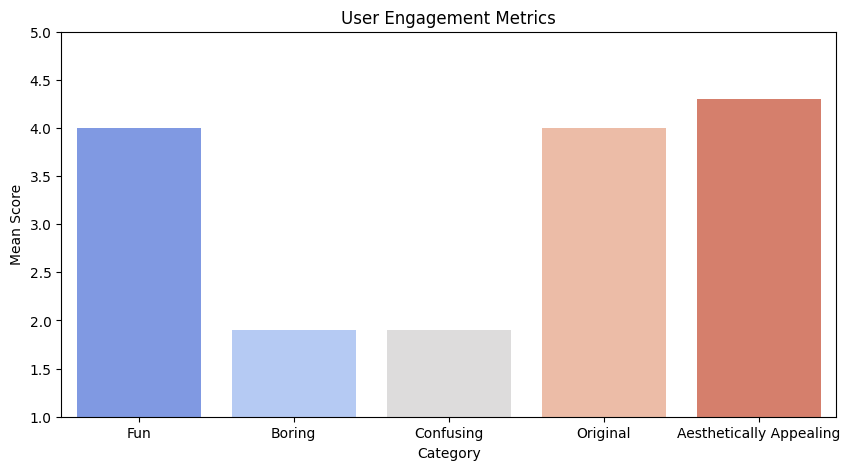

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Sample data from Table 1
data = {
    "Category": ["Fun", "Boring", "Confusing", "Original", "Aesthetically Appealing"],
    "Mean Score": [4.00, 1.90, 1.90, 4.00, 4.30]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x="Category", y="Mean Score", data=df, hue="Category", palette="coolwarm", legend=False)
plt.ylim(1,5)
plt.title("User Engagement Metrics")
plt.show()


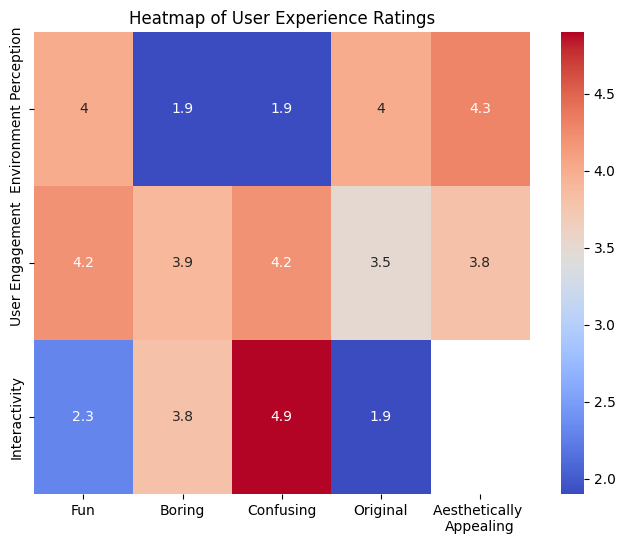

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
heatmap_data = np.array([
    [4.00, 1.90, 1.90, 4.00, 4.30], # Environment Perception
    [4.20, 3.90, 4.20, 3.50, 3.80], # User Engagement
    [2.30, 3.80, 4.90, 1.90, np.nan]  # Interactivity, replace None with np.nan
])

labels = ["Fun", "Boring", "Confusing", "Original", "Aesthetically \nAppealing"]
categories = ["Environment Perception", "User Engagement", "Interactivity"]

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", xticklabels=labels, yticklabels=categories)
plt.title("Heatmap of User Experience Ratings")
plt.show()

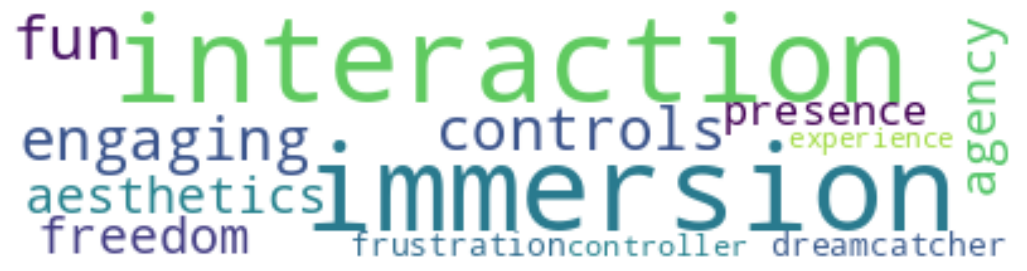

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = """immersion interaction engaging controls fun aesthetics agency freedom presence dreamcatcher frustration controller experience"""
wordcloud = WordCloud(width=400, height=100, background_color="white").generate(text)

plt.figure(figsize=(13,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



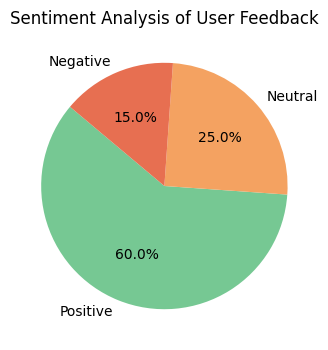

In [31]:
labels = ["Positive", "Neutral", "Negative"]
sizes = [60, 25, 15]  # Adjust according to your dataset
colors = ["#76c893", "#f4a261", "#e76f51"]

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Sentiment Analysis of User Feedback")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-34-e0a60eef497f>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_words['Word'][:10], y=df_words['Frequency'][:10], palette="viridis")


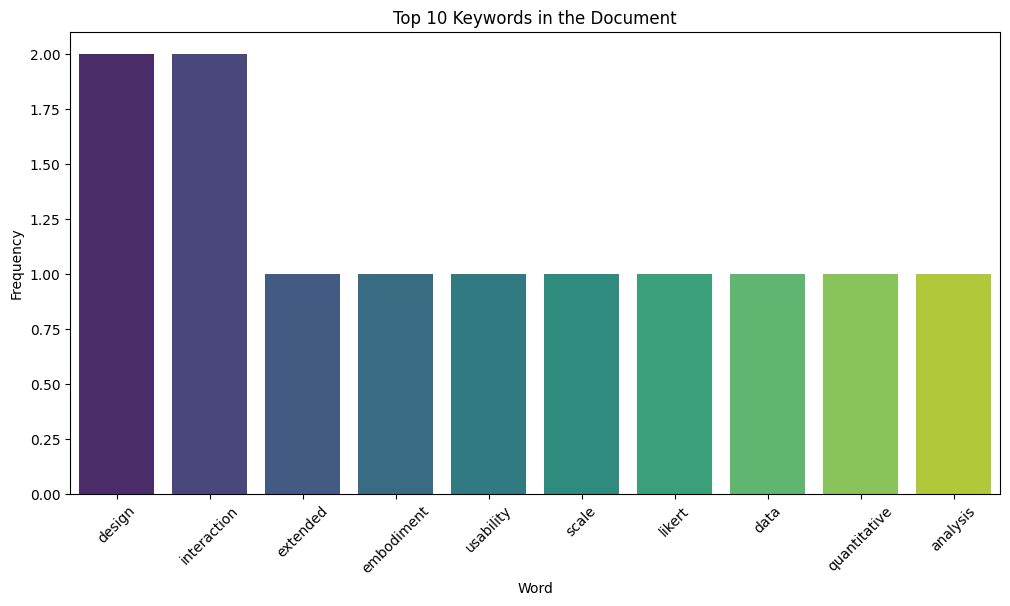

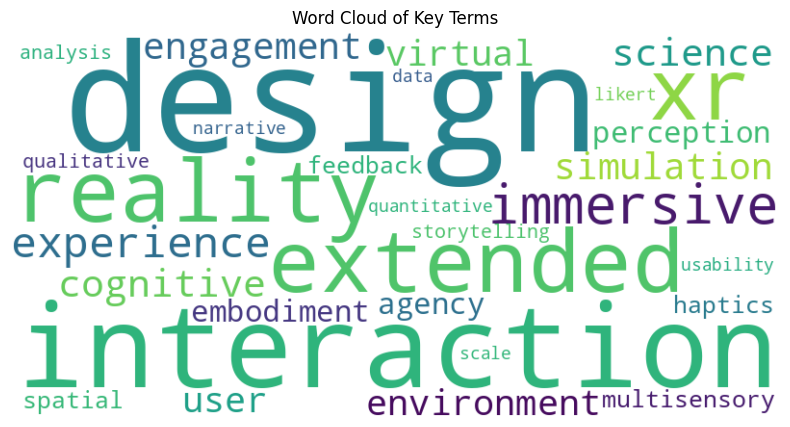

Topic 1: centered, analysis, virtual, design, interaction
Topic 2: cognitive, centered, analysis, virtual, xr
Topic 3: cognitive, centered, analysis, virtual, xr


In [34]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Sample extracted text from the document
document_text = """Extended Reality (XR), immersive experience, human-centered design, cognitive science,
interaction, engagement, simulation, virtual environment, user perception, agency, embodiment,
multisensory, spatial interaction, feedback, haptics, storytelling, qualitative analysis,
quantitative data, Likert scale, usability, narrative design"""

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab resource

# Tokenization and Cleaning
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(document_text.lower())
filtered_words = [word for word in tokens if word.isalpha() and word not in stop_words]

# Count Word Frequencies
word_counts = Counter(filtered_words)
df_words = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by="Frequency", ascending=False)

# Visualization 1: Bar Chart for Most Frequent Words
plt.figure(figsize=(12,6))
sns.barplot(x=df_words['Word'][:10], y=df_words['Frequency'][:10], palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Keywords in the Document")
plt.show()

# Visualization 2: Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Key Terms")
plt.show()

# Topic Modeling with LDA
vectorizer = CountVectorizer(max_df=1.0, stop_words='english') # Change max_df to 1.0
X = vectorizer.fit_transform([document_text])
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Extracting Topics
terms = vectorizer.get_feature_names_out()
topics = []
for idx, topic in enumerate(lda.components_):
    topics.append([terms[i] for i in topic.argsort()[-5:]])

# Display Topics
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")